<a href="https://colab.research.google.com/github/JCFondeur/First-try/blob/master/AnaANDebats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!ls /content/drive/MyDrive/Colab\ Notebooks

 A.ipynb			   guide_aggir_2008.pdf
 allDebats2.csv			   nlpBertTrain.ipynb
 allDebats.csv			   temperature-quotidienne-regionale.csv
 AnaANDebats.ipynb		   twitterSentiment.ipynb
 AssembleeNationale.ipynb	   Untitled0.ipynb
'Copy of twitterSentiment.ipynb'   Untitled1.ipynb
 eco2mix-national-cons-def.csv	   Untitled2.ipynb
 eco2mix-national-tr.csv	   zero_to_deep_learning_video-master


In [3]:
debats=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/allDebats2.csv', sep='|')
debats.sample(10)

,seance,orateur,orateur_id,intervention,title,role,parti,fileName
272596,Séance du lundi 29 mars 2021,M. Jean-Luc Mélenchon.,PA2150,Allons donc !,1 • Lutte contre le dérèglement climatique,député,La France insoumise,P2457336.html
50589,Séance du mardi 17 novembre 2020,M. Sylvain Maillard.,PA717379,"Qu’avez-vous fait, pendant la législature pré...",4 • Programmation de la recherche pour les ann...,député,La République en Marche,P2457336.html
85806,Séance du jeudi 26 novembre 2020,Mme la présidente.,PA605991,"Prochaine séance, cet après-midi, à quinze he...",5 • Ordre du jour de la prochaine séance,député,Les Républicains,P2457336.html
58469,Séance du lundi 26 octobre 2020,Mme la présidente.,PA605991,Quel est l’avis de la commission ?,1 • Projet de loi de finances pour 2021,député,Les Républicains,P2457336.html
221344,Séance du mercredi 20 janvier 2021,M. le président.,PA720746,La parole est à M. Ian Boucard.,1 • Prorogation de l’état d’urgence sanitaire,député,Mouvement Démocrate (MoDem) et Démocrates appa...,P2457336.html
129477,Séance du vendredi 09 avril 2021,"Mme Barbara Pompili, ministre.",PA609520,Mais l’État se substitue aux opérateurs !(L’a...,1 • Lutte contre le dérèglement climatique,ministre.,NaN,P2457336.html
202598,Séance du jeudi 15 avril 2021,M. le président.,PA720746,La parole est à Mme Emmanuelle Ménard.,2 • Protection des jeunes mineurs contre les c...,député,Mouvement Démocrate (MoDem) et Démocrates appa...,P2457336.html
51122,Séance du mardi 08 décembre 2020,M. le président.,PA606171,"S’il vous plaît, chers collègues, écoutons ma...",2 • Questions au Gouvernement,député,La République en Marche,P2457336.html
177521,Séance du vendredi 16 octobre 2020,M. le président.,PA721824,La parole est à M. Éric Coquerel.,1 • Projet de loi de finances pour 2021,député,La République en Marche,P2457336.html
57913,Séance du mardi 02 mars 2021,Mme Karine Lebon.,PA774962,Le constat est unanime : la jeunesse est part...,1 • Moyens de remédieraux effets de l’épidémie...,député,Gauche démocrate et républicaine,P2457336.html


In [4]:
longInter = debats[debats.intervention.apply(lambda r:len(r.split(' ')) if isinstance(r,str) else 0)>100]

In [5]:
text = longInter.intervention.iloc[0]

In [6]:
text

' Une grande démocratie se mesure aussi à l’état de ses prisons. Je ne peux pas me résoudre à l’idée que la France, patrie des droits de l’homme, soit régulièrement condamnée pour l’indignité de ses détentions.N’en déplaise aux abolitionnistes de la prison, la peine d’emprisonnement est, je le redis, nécessaire à l’État de droit et à la République. Elle ne peut, bien sûr, être la seule réponse judiciaire, comme certains responsables politiques populistes le soutiennent. La prison s’impose lorsqu’elle est l’unique solution pour assurer la sécurité de nos concitoyens, afin de mettre à l’écart les délinquants dangereux. Je veux parler des terroristes, de ceux qui ont commis des actes d’atteinte aux personnes, de la criminalité organisée, des trafics de grande ampleur.Cependant, la privation de liberté ne doit jamais correspondre à une privation de dignité\xa0: c’est une question d’humanité. Pour la délinquance de basse intensité, l’incarcération n’est pas la solution. Les courtes peines e

In [7]:
text = ". ".join(longInter.intervention)

In [8]:
!pip install --upgrade spacy

In [9]:
!python -m spacy download fr_dep_news_trf

     |████████████████████████████████| 400.7 MB 26 kB/s 
     |████████████████████████████████| 51 kB 154 kB/s 
     |████████████████████████████████| 1.2 MB 7.7 MB/s 
     |████████████████████████████████| 1.1 MB 44.1 MB/s 
     |████████████████████████████████| 3.4 MB 36.0 MB/s 
     |████████████████████████████████| 895 kB 46.4 MB/s 
     |████████████████████████████████| 67 kB 5.7 MB/s 
     |████████████████████████████████| 3.3 MB 41.3 MB/s 
     |████████████████████████████████| 596 kB 55.9 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
✔ Download and installation successful
You can now load the package via spacy.load('fr_dep_news_trf')


In [10]:
import spacy
import spacy_transformers
import fr_dep_news_trf

nlp = fr_dep_news_trf.load()

df=debats[debats.intervention.apply(lambda r:len(r.split(' ')) if isinstance(r,str) else 0)>1000]

words=[]

for i,r in df.iterrows():
  print(len(r['intervention'].split('.')), end=',')
  for sent in r['intervention'].split('.'):
    doc = nlp(sent) 
    for token in doc:
        if token.tag_ in ['ADJ', 'NOUN', 'VERB']:
          words.append(token.lemma_)

47,39,41,47,46,68,50,47,35,84,45,58,51,45,33,64,46,84,55,68,

KeyboardInterrupt: ignored

In [16]:
df.sample(10)

,seance,orateur,orateur_id,intervention,title,role,parti,fileName
253915,Séance du jeudi 14 janvier 2021,M. Jean-Christophe Lagarde.,PA268019,Le sujet de l’indépendance de la justice revi...,2 • Conclusions du rapport de la commission d’...,député,UDI et Indépendants,P2457336.html
233923,Séance du jeudi 10 décembre 2020,M. Jean-Félix Acquaviva.,PA719146,"D’autant plus qu’aujourd’hui, si on est beauc...",3 • Justice pénale des mineurs,député,Libertés et Territoires,P2457336.html
161994,Séance du mercredi 13 janvier 2021,Mme Patricia Lemoine.,PA721632,"Le 22 novembre 2019 à Amiens, le Président de...",1 • Maisons France services,député,Agir ensemble,P2457336.html
221147,Séance du mercredi 20 janvier 2021,M. Ian Boucard.,PA721816,Notre assemblée est réunie pour examiner un p...,1 • Prorogation de l’état d’urgence sanitaire,député,Les Républicains,P2457336.html
98101,Séance du mardi 19 janvier 2021,"Mme Marlène Schiappa, ministre déléguée chargé...",PA717163,Nous examinons aujourd’hui un projet de loi o...,4 • Élection du Président de la République,ministre déléguée chargée de la citoyenneté.,NaN,P2457336.html
257433,Séance du vendredi 02 avril 2021,"Mme Olivia Grégoire, secrétaire d’État.",PA721764,Le sujet est important : si vous m’y autorise...,1 • Lutte contre le dérèglement climatique,secrétaire d’État.,NaN,P2457336.html
186493,Séance du lundi 23 novembre 2020,Mme Caroline Fiat.,PA720286,"…ou pas, me revoici parmi vous. Je ne peux co...",2 • Projet de loi de financement de la sécurit...,député,La France insoumise,P2457336.html
91703,Séance du jeudi 04 mars 2021,M. Thomas Gassilloud.,PA722358,Nous sommes réunis ce jour pour débattre de l...,1 • Politiques de la France au Sahel,député,Agir ensemble,P2457336.html
81014,Séance du lundi 01 février 2021,M. Paul Molac.,PA607619,"Vous le savez, dans sa première mouture, évoq...",1 • Respect des principes de la République,député,Libertés et Territoires,P2457336.html
117070,Séance du lundi 30 novembre 2020,"M. Olivier Véran, ministre.",PA642788,J’ignore si c’est une passerelle entre le mon...,3 • Amélioration du système de santé par la co...,ministre.,NaN,P2457336.html


In [15]:
df.title.unique()

array(['2 • Droit au respect de la dignité en détention',
       '2 • Réforme de l’adoption',
       '1 • Impact de la crise sur la jeunesse',
       '2 • Dimension logistique de la stratégie vaccinale contre la covid-19',
       '1 • Suivi des projets franco-allemands mis en place par le traité d’Aix-la-Chapelle',
       '2 • Politique du logement',
       '1 • Lutte contre le dérèglement climatique',
       '2 • Projet de loi de finances pour 2021',
       '1 • Accord de coopération avec les États membres de l’Union monétaire ouest-africaine',
       '3 • Justice pénale des mineurs',
       '1 • Projet de loi de finances pour 2021',
       '1 • Débat public sur le socle citoyen',
       '1 • Aide individuelle à l’émancipation solidaire',
       '4 • Programmation de la recherche pour les années 2021 à 2030',
       '3 • Déclaration du Gouvernement suivie d’un débat et d’un vote \n                                                                                                (suite)',

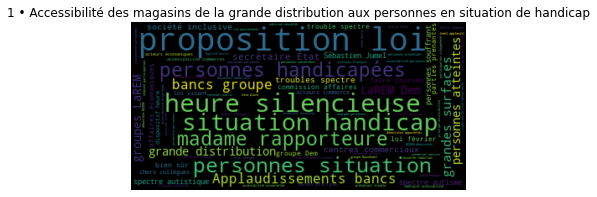

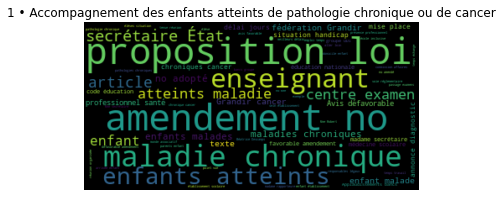

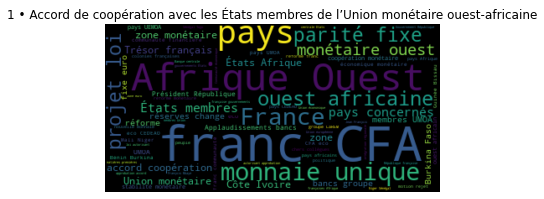

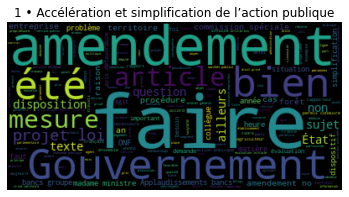

In [78]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def showCloud(n, g):
  l=[]
  for i,t in g.iterrows():
    l = l + t['intervention'].split(' ')
  # Generate a word cloud image
  wordcloud = WordCloud(stopwords=nlp.Defaults.stop_words.union(set(['qu']))).generate(" ".join(l))
  plt.figure()
  plt.title(n)
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  
groups=longInter.groupby('title')
for i, name in enumerate(groups.groups.keys()):
  showCloud(name, groups.get_group(name))
  if i>2: break



In [ ]:
df.intervention.value_counts()


 Robert Badinter, interrogé il y a plusieurs années sur l’intérêt d’un parquet européen, avait déclaré devant la Commission européenne : « Ce ne sont pas les idées qui font défaut, c’est la volonté politique ». Je me réjouis, après quelque quinze ans de négociations, que la volonté politique nous permette aujourd’hui d’aller au bout de ce processus. C’est une étape historique que nous nous apprêtons à franchir en créant un espace de justice européen à part entière dédié à la lutte contre la fraude. Nous en sommes les acteurs avec nos amis sénateurs, et c’est pour moi un autre motif de réjouissance.En plus d’aborder le parquet européen, le projet de loi améliore notre dispositif national dans les domaines de la justice pénale spécialisée et de la justice environnementale.Le parquet européen nous permettra de mieux lutter contre une délinquance financière astucieuse et jusqu’alors insuffisamment réprimée. La compétence européenne est naturelle dans ce domaine, car cette délinquance est i

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [ ]:
wordcloud = WordCloud(background_color = 'white', max_words = 50).generate(" ".join(words))
plt.imshow(wordcloud)
plt.axis("off")
plt.show();

ValueError: ignored

In [ ]:
summarizer = pipeline("summarization", 
                       model="moussaKam/barthez-orangesum-title")
summarizer(text)

Downloading:   0%|          | 0.00/1.43k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/824M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.51M [00:00<?, ?B/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (1646 > 1024). Running this sequence through the model will result in indexing errors


IndexError: ignored

In [ ]:
import spacy